<font color='red'>
Grade: A
    
Great Job!
    
1. Great.

2. Great.

3. Great. Missing a plot for Rap2.

# Programming HW 5

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
%matplotlib inline

## Problem 1

Revisit the grocery retailer problem.

**Grocery retailer**. A large,national grocery retailer tracks productivity and costs of its facilities closely. Data were obtained from a single distribution center for a one-year period. Each data point for each variable represents one week of activity. The variables included are the number of cases shipped ($x_1$) (Column 2), the indirect costs of the total labor hours as a percentage ($x_2$) (Column 3), a qualitative predictor called holiday that is coded 1 if the week has a holiday and 0 otherwise ($x_3$) (Column 4), and the total labor hours ($y$) (Column 1).

The data are in "Grocery.txt".

(a) Fit first-order simple linear regression model for relating total hours required to handle shipment ($y$) to total number of cases shipped ($x_1$). State the fitted regression function.

(b) Fit first-order simple linear regression model for relating total hours required to handle shipment ($y$) to all three predictors. Compare the estimated regression coefficient for total cases shipped obtained in part (a) with the corresponding coefficient obtained here. What do you find?

(c) Does $\text{SSR}(x_1)$ equal $\text{SSR}(x_1|x_2)$ here? If not, is the difference substantial?

(d) Find the correlation matrix. What bearing does this have on your findings in Parts (b) and (c).

In [9]:
G=pd.read_csv('Grocery.txt', delim_whitespace=True, names= ['Hours','CasesShipped','IndirectCosts','Holiday'])
n=G.shape[0]
G.head(n)
y=G['Hours'].to_numpy()

print('1#a')
x1=G['CasesShipped'].to_numpy()
X1=sm.add_constant(x1)
results1= sm.OLS(y,X1).fit()
print(results1.summary())
b0 = results1.params[0]
b1 = results1.params[1]
print( )
print('y=',b0, '+', b1,'x1')
print( )
print( )

print('1#b')

x123=G[['CasesShipped','IndirectCosts','Holiday']].to_numpy()
X123=sm.add_constant(x123)
results= sm.OLS(y,X123).fit()
print(results.summary())
print( )
print('b=', results.params)
print( )
print('I find the estimated regression coefficient for total cases shipped obtained in part (a) is larger than the corresponding coefficient obtained here')
print( )
print( )

print('1#c')

lm=smf.ols('Hours~IndirectCosts+CasesShipped+Holiday', data=G).fit()
table=sm.stats.anova_lm(lm)
print('SSR(𝑥1|𝑥2)=',table.sum_sq[1])

x12=G[['CasesShipped','IndirectCosts']].to_numpy()
X12=sm.add_constant(x12)
results12= sm.OLS(y,X12).fit()
print('SSR(𝑥1,𝑥2)=',results12.mse_model*2)

x2=G['IndirectCosts'].to_numpy()
X2=sm.add_constant(x2)
results2= sm.OLS(y,X2).fit()
print('SSR(x1)=', results1.mse_model)

print('SSR(x1|x2)=SSR(𝑥1,𝑥2)-SSR(x1)=', results12.mse_model*2-results2.mse_model)

print('SSR(𝑥1) is not equal to  SSR(𝑥1|𝑥2),  the difference is substantial')
print( )
print( )

print('1#d')
X=G[['CasesShipped','IndirectCosts','Holiday']].to_numpy()
rxx=np.corrcoef(X.T)
print('rxx= ', '\n', rxx)
print( )
print('np.corrcoef(y,X.T)= ', '\n', np.corrcoef(y, X.T))
ryx=np.corrcoef(y, X.T)[1:,0]
print( )
print('ryx= ', '\n', ryx)
print( )
bstar=np.dot(np.linalg.inv(rxx),ryx)
print('bstar= ','\n', bstar)
print( )
print('I found x1 and x2 have correlations that leads to the results in Parts (b) and (c)' )




1#a
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.253
Date:                Thu, 16 Apr 2020   Prob (F-statistic):              0.140
Time:                        14:31:43   Log-Likelihood:                -359.04
No. Observations:                  52   AIC:                             722.1
Df Residuals:                      50   BIC:                             726.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4079.8699    191.696     21.283     

## Problem 2

Revisit the CDI data set. The number of active physicians ($y$) (Column 8) is to be regressed against total population ($x_1$) (Column 5), total personal income ($x_2$) (Column 16), and geographic region ($x_3$, $x_4$, $x_5$) (Column 17). For the geographic region data, NE is coded as $1$, NC as $2$, S as $3$ and W as $4$. 

(a) Fit a first-order regression model. Let $x_3 = 1$ if NE and $0$ otherwise, $x_4 = 1$ if NC and $0$ otherwise, and $x_5 = 1$ if $S$ and $0$ otherwise.

(b) What is the estimator for the differential effect of the northeastern region and the the north central region on the number of active physicians?

(c) Use the general linear test approach to test whether any geographic effects are present; use $\alpha = .10$. State the alternatives, decision rule, and conclusion. What is the $P$-value of the test?

(Hint: if you are using pd.read_csv, it has a usecols argument so that specific columns can be read in. Note that element order is ignored. usecols=[0, 1] is the same as [1, 0]. See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [21]:
CDI=pd.read_csv('CDI.txt', delim_whitespace=True, usecols=(4,7,15,16),names= ['population','Nphysicians','income','region'])
n=CDI.shape[0]
CDI.head(n)

print('2#a')
x12=CDI[['population','income']].to_numpy()
y=CDI['Nphysicians'].to_numpy()

X3=[]
for i in range(0,n,1):
    if CDI[['region']].to_numpy()[i]==1:
        x3=1
    else:
        x3=0
    X3.append(x3)
x3= np.asarray(X3) 
CDI['NE']=x3


X4=[]
for i in range(0,n,1):
    if CDI[['region']].to_numpy()[i]==2:
        x4=1
    else:
        x4=0
    X4.append(x4)
x4= np.asarray(X4) 
CDI['NC']=x4

X5=[]
for i in range(0,n,1):
    if CDI[['region']].to_numpy()[i]==3:
        x5=1
    else:
        x5=0
    X5.append(x5)
x5= np.asarray(X5) 
CDI['S']=x5
print(CDI)

x12345=np.concatenate((x12,x3[:,np.newaxis],x4[:,np.newaxis],x5[:,np.newaxis]),axis=1)
X12345=sm.add_constant(x12345)

print(x12345)

results=sm.OLS(y,X12345).fit()

b0 = results.params[0]
b1 = results.params[1]
b2 = results.params[2]
b3 = results.params[3]
b4 = results.params[4]
b5 = results.params[5]
print( )
print('y=',b0, '+', b1,'x1 +', b2,'x2+',  b3,'x3+',b4, 'x4',b5,'x5')



print( )
print( )

print('2#b')
print('the differential effect of the northeastern region and the the north central region is: ' ,b3-b4)


print( )
print( )

print('2#c')
print('H_0:β_3=β_4=β_5=0 ' '\n' 'H_a:at least one of β_3,β_4,β_5 is not equal to 0')
print( )

x12=CDI[['population','income']].to_numpy()
X12=sm.add_constant(x12)
results1=sm.OLS(y,X12).fit()

SSR=results.mse_model*5-results1.mse_model*2
print('SSR(x3,x4,x5|x1,x2)=SSR(x1,x2,x3,x4,x5)-SSR(x1,x2)=',SSR)

MSR=SSR/3
MSE=results.ssr/(n-6)
Fstar=MSR/MSE

print('Fstar=',Fstar)
print('F=',sp.stats.f.ppf(0.90,3,n-6))
print( )
if Fstar<=sp.stats.f.ppf(0.90,3,n-6):
     print('conclude H0: geographic effects are not present'); 
elif Fstar>sp.stats.f.ppf(0.90,3,n-6):
    print('conclude Ha: at least one geographic effect is present'); 
    
print('the P-value is', sp.stats.f.sf(Fstar,3,n-6) )


2#a
     population  Nphysicians  income  region  NE  NC  S
0       8863164        23677  184230       4   0   0  0
1       5105067        15153  110928       2   0   1  0
2       2818199         7553   55003       3   0   0  1
3       2498016         5905   48931       4   0   0  0
4       2410556         6062   58818       4   0   0  0
..          ...          ...     ...     ...  ..  .. ..
435      101115           98    1407       3   0   0  1
436      100900          193    2737       3   0   0  1
437      100498           87    1323       3   0   0  1
438      100374          192    1857       4   0   0  0
439      100043          122    1647       3   0   0  1

[440 rows x 7 columns]
[[8863164  184230       0       0       0]
 [5105067  110928       0       1       0]
 [2818199   55003       0       0       1]
 ...
 [ 100498    1323       0       0       1]
 [ 100374    1857       0       0       0]
 [ 100043    1647       0       0       1]]

y= -207.49574915990752 + 0.00055145

## Problem 3

**Patient satisfaction**. A hospital administrator wished to study the relation between patient satisfaction ($y$) (Column 1) and patient's age ($x_1$, in years) (Column 2), severity of illness ($x_2$, an index) (Column 3), and anxiety level ($x_3$, an index) (Column 4). The administrator randomly selected $46$ patients and collected the data, where larger values of $y$ , $x_2$, and $x_3$ are, respectively, associated with more satisfaction, increased severity of illness, and more anxiety.

The data are in "PatientSat.txt".

The hospital administrator wishes to determine the best subset or predictor variables for predicting patient satisfaction.

Indicate which subset of predictor variables you would recommend as best for predicting patient satisfaction according to each of the following criteria:              
               (1) $R_{a,p}^2$, (2) $\text{AIC}_p $.
      You can use the built-in AIC values from the results of ols or OLS. Support your recommendations with appropriate graphs.

3(1)
X variables in Model   p      Rap2   
        None           1   -0.000000 
         x1            2    0.610325 
         x2            2    0.349074 
         x3            2    0.402213 
       x1,x2           3    0.638907 
       x1,x3           3    0.661021 
       x2,x3           3    0.443731 
      x1,x2,x3         4    0.659494 

dfms= 
      p  rsquared_adj
0  1.0 -2.220446e-16
1  2.0  6.103248e-01
2  2.0  3.490737e-01
3  2.0  4.022134e-01
4  3.0  6.389073e-01
5  3.0  6.610206e-01
6  3.0  4.437314e-01
7  4.0  6.594939e-01


3(2)
X variables in Model   p     AIC_p   
        None           1   262.915461
         x1            2   220.529391
         x2            2   244.131202 
         x3            2   240.213723
       x1,x2           3   217.967647 
       x1,x3           3   215.060654 
       x2,x3           3   237.845006 
      x1,x2,x3         4   216.184962 

dfms= 
      p       AIC_p
0  1.0  262.915461
1  2.0  220.529391
2  2.0  244.131202
3  2.0  240.2137

Text(0, 0.5, '$AIC_p$')

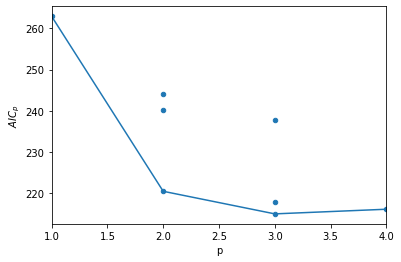

In [5]:
df=pd.read_csv('PatientSat.txt', delim_whitespace= True, names=['sat','age','illness','anxiety'])
n=df.shape[0]

print('3(1)')
dfms = pd.DataFrame(columns=['p', 'rsquared_adj'])
dfms = dfms.astype({'p': 'int', 'rsquared_adj': 'float'})
print("{0:^20} {1:^5} {2:^10}".format('X variables in Model', 'p', 'Rap2'))

# p = 1, i.e. no variable is included in the model

p = 1
lm = smf.ols('sat~1', data=df).fit()
print("{0:^20} {1:^5d} {2:^10f}".format('None', p, lm.rsquared_adj))
# update dfms
dfms = dfms.append({'p': p, 'rsquared_adj': lm.rsquared_adj}, ignore_index=True)

# p = 2, i.e., only one variable is included in the model
p = 2
# only x1
lm = smf.ols('sat~age', data=df).fit()
print("{0:^20} {1:^5d} {2:^10f}".format('x1', p, lm.rsquared_adj))
# update dfms
dfms = dfms.append({'p': p, 'rsquared_adj': lm.rsquared_adj}, ignore_index=True)
# only x2
lm = smf.ols('sat~illness', data=df).fit()
print("{0:^20} {1:^5d} {2:^10f}".format('x2', p, lm.rsquared_adj))
# update dfms
dfms = dfms.append({'p': p, 'rsquared_adj': lm.rsquared_adj}, ignore_index=True)
# only x3
lm = smf.ols('sat~anxiety', data=df).fit()
print("{0:^20} {1:^5d} {2:^10f}".format('x3', p, lm.rsquared_adj))
# update dfms
dfms = dfms.append({'p': p, 'rsquared_adj': lm.rsquared_adj}, ignore_index=True)

# p = 3, i.e., only two variable are included in the model
p = 3
# only x1, x2
lm = smf.ols('sat~age+illness', data=df).fit()
print("{0:^20} {1:^5d} {2:^10f}".format('x1,x2', p, lm.rsquared_adj))
# update dfms
dfms = dfms.append({'p': p, 'rsquared_adj': lm.rsquared_adj}, ignore_index=True)
# only x1, x3
lm = smf.ols('sat~age+anxiety', data=df).fit()
print("{0:^20} {1:^5d} {2:^10f}".format('x1,x3', p, lm.rsquared_adj))
# update dfms
dfms = dfms.append({'p': p, 'rsquared_adj': lm.rsquared_adj}, ignore_index=True)
# only x2, x3
lm = smf.ols('sat~illness+anxiety', data=df).fit()
print("{0:^20} {1:^5d} {2:^10f}".format('x2,x3', p, lm.rsquared_adj))
# update dfms
dfms = dfms.append({'p': p, 'rsquared_adj': lm.rsquared_adj}, ignore_index=True)

# p = 4, i.e., only three variable are included in the model
p = 4
# only x1, x2, x3
lm = smf.ols('sat~age+illness+anxiety', data=df).fit()
print("{0:^20} {1:^5d} {2:^10f}".format('x1,x2,x3', p, lm.rsquared_adj))
# update dfms
dfms = dfms.append({'p': p, 'rsquared_adj': lm.rsquared_adj}, ignore_index=True)
print()
print('dfms=', '\n', dfms)


print( )
print( )

print('3(2)')

dfms = pd.DataFrame(columns=['p', 'AIC_p'])
dfms = dfms.astype({'p': 'int', 'AIC_p': 'float'})
print("{0:^20} {1:^5} {2:^10}".format('X variables in Model', 'p', 'AIC_p',))

# p = 1, i.e. no variable is included in the model
p = 1
lm = smf.ols('sat~1', data=df).fit()
AIC = n*np.log(lm.ssr) - n*np.log(n) + 2*p
print("{0:^20} {1:^5d} {2:^10f}".format('None', p, AIC))
# update dfms
dfms = dfms.append({'p': p, 'AIC_p': AIC}, ignore_index=True)

# p = 2, i.e., only one variable is included in the model
p = 2
# only x1
lm = smf.ols('sat~age', data=df).fit()
AIC = n*np.log(lm.ssr) - n*np.log(n) + 2*p
print("{0:^20} {1:^5d} {2:^10f}".format('x1', p, AIC,))
# update dfms
dfms = dfms.append({'p': p, 'AIC_p': AIC}, ignore_index=True)
# only x2
lm = smf.ols('sat~illness', data=df).fit()
AIC = n*np.log(lm.ssr) - n*np.log(n) + 2*p
print("{0:^20} {1:^5d} {2:^10f} ".format('x2', p, AIC,))
# update dfms
dfms = dfms.append({'p': p, 'AIC_p': AIC}, ignore_index=True)
# only x3
lm = smf.ols('sat~anxiety', data=df).fit()
AIC = n*np.log(lm.ssr) - n*np.log(n) + 2*p
print("{0:^20} {1:^5d} {2:^10f}".format('x3', p, AIC,))
# update dfms
dfms = dfms.append({'p': p, 'AIC_p': AIC}, ignore_index=True)


p = 3
# only x1, x2
lm = smf.ols('sat~age+illness', data=df).fit()
AIC = n*np.log(lm.ssr) - n*np.log(n) + 2*p
print("{0:^20} {1:^5d} {2:^10f} ".format('x1,x2', p, AIC,))
# update dfms
dfms = dfms.append({'p': p, 'AIC_p': AIC}, ignore_index=True)
# only x1, x3
lm = smf.ols('sat~age+anxiety', data=df).fit()
AIC = n*np.log(lm.ssr) - n*np.log(n) + 2*p
print("{0:^20} {1:^5d} {2:^10f} ".format('x1,x3', p, AIC,))
# update dfms
dfms = dfms.append({'p': p, 'AIC_p': AIC}, ignore_index=True)
# only x2, x3
lm = smf.ols('sat~illness+anxiety', data=df).fit()
AIC = n*np.log(lm.ssr) - n*np.log(n) + 2*p
print("{0:^20} {1:^5d} {2:^10f} ".format('x2,x3', p, AIC,))
# update dfms
dfms = dfms.append({'p': p, 'AIC_p': AIC}, ignore_index=True)

# p = 4, i.e., only three variable are included in the model
p = 4
# only x1, x2, x3
lm = smf.ols('sat~age+illness+anxiety', data=df).fit()
AIC = n*np.log(lm.ssr) - n*np.log(n) + 2*p
print("{0:^20} {1:^5d} {2:^10f} ".format('x1,x2,x3', p, AIC,))
# update dfms
dfms = dfms.append({'p': p, 'AIC_p': AIC}, ignore_index=True)

print()
print('dfms=', '\n', dfms)
print()

fig, ax = plt.subplots()
# Plot AIC_p vs p
dfms.plot(x='p', y='AIC_p', kind='scatter', ax=ax)
# Find the minimum AIC_p for each p and connect the points
dfms_grp = dfms.groupby(['p']).min()
dfms_grp['AIC_p'].plot(kind='line', ax=ax, legend=False)
plt.xlabel('p')
plt.ylabel('$AIC_p$')

